<br><br>
<h1 align="center"> 02 Data Visualization and Inferences - ggplot </h1>
<br><br>

In [1]:
'''import thpe libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import hashlib
import joblib
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

plt.style.use('ggplot')

In [2]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

'''Update the datetime columns from String to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

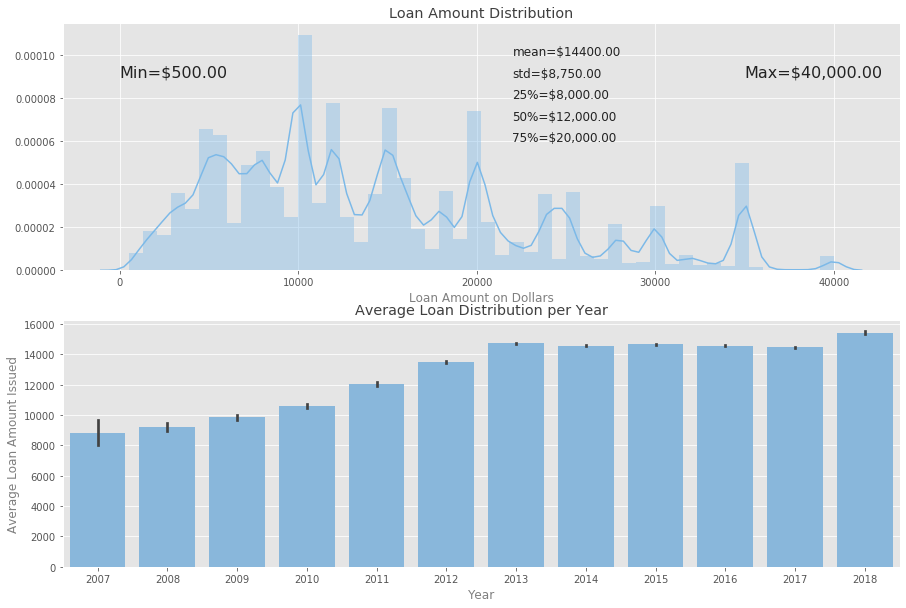

In [3]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))


plt.subplot(2, 1, 1)
sns.distplot(loan_data['loan_amnt'], color="#7CB9E8")

plt.xlabel("Loan Amount on Dollars", alpha = 0.75)
plt.title("Loan Amount Distribution", alpha = 0.75)
plt.text(x=-5, y=0.00009, s='Min=$500.00', fontsize=16, alpha=0.85)
plt.text(x=35000, y=0.00009, s='Max=$40,000.00', fontsize=16, alpha=0.85)

plt.text(x=22000, y=0.00010, s='mean=$14400.00', fontsize=12, alpha=0.85)
plt.text(x=22000, y=0.00009, s='std=$8,750.00', fontsize=12, alpha=0.85)
plt.text(x=22000, y=0.00008, s='25%=$8,000.00', fontsize=12, alpha=0.85)
plt.text(x=22000, y=0.00007, s='50%=$12,000.00', fontsize=12, alpha=0.85)
plt.text(x=22000, y=0.00006, s='75%=$20,000.00', fontsize=12, alpha=0.85)

plt.subplot(2, 1, 2)
sns.barplot(loan_data['issue_d'].dt.year, 'loan_amnt', data=loan_data, color="#7CB9E8")

plt.title('Average Loan Distribution per Year', alpha = 0.75)
plt.xlabel('Year', alpha = 0.75)
plt.ylabel('Average Loan Amount Issued', alpha = 0.75)

plt.savefig('plots/9.png')
plt.show()

In [4]:
'''Separate numeric and categorical features'''
numeric = loan_data.select_dtypes(exclude=["object"])
categorical = loan_data.select_dtypes(["object"])

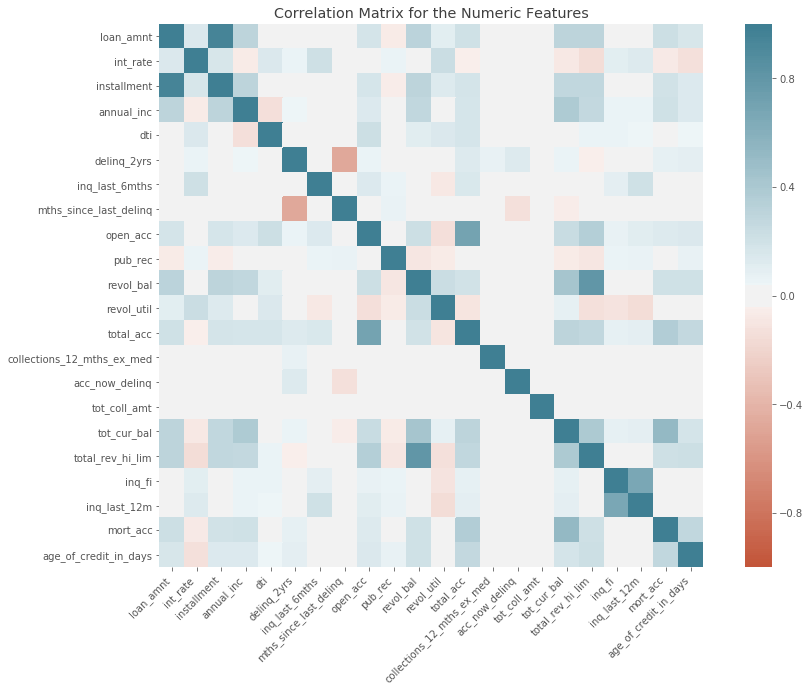

In [10]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))
corr = numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title('Correlation Matrix for the Numeric Features', alpha = 0.75)

plt.savefig('plots/35.png', bbox_inches="tight")
plt.show()

In [4]:
'''Split the data to 80% training set and 20% test set'''
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.001, random_state=42)

for train_set, test_set in stratified.split(loan_data, loan_data["loan_status"]):
    stratified_train = loan_data.loc[train_set]
    stratified_test = loan_data.loc[test_set]
    
print('Train Set Ratio \n', stratified_train["loan_status"].value_counts()/len(stratified_train))
print('Test Set Ratio \n', stratified_test["loan_status"].value_counts()/len(stratified_test))

Train Set Ratio 
 Fully Paid            0.778608
Charged Off           0.195524
Late (31-120 days)    0.016363
In Grace Period       0.006689
Late (16-30 days)     0.002792
Default               0.000023
Name: loan_status, dtype: float64
Test Set Ratio 
 Fully Paid            0.778193
Charged Off           0.195668
Late (31-120 days)    0.016430
In Grace Period       0.006721
Late (16-30 days)     0.002987
Name: loan_status, dtype: float64


In [5]:
'''Lets prepare the data'''
train_df = stratified_train
test_df = stratified_test

# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

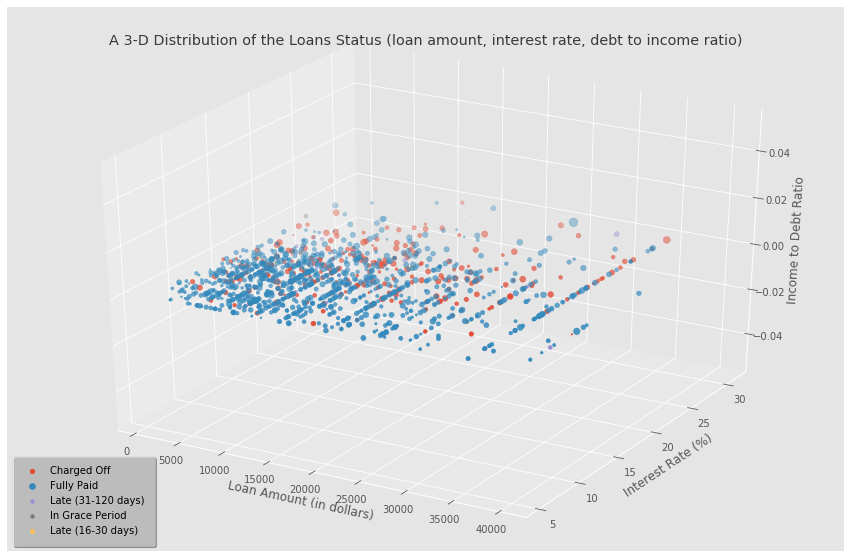

In [6]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

p = plt.subplot(1, 1, 1, projection='3d')

ls_list = test_df['loan_status'].unique().tolist()


for l in ls_list:
    loan_data_sub = test_df[test_df['loan_status'] == l]
    plt.scatter(loan_data_sub['loan_amnt'], loan_data_sub['int_rate'], loan_data_sub['dti'], 
                label=l, cmap="Blues")


p.set_xlabel('Loan Amount (in dollars)')
p.set_ylabel('Interest Rate (%)')
p.set_zlabel('Income to Debt Ratio')
plt.title('A 3-D Distribution of the Loans Status (loan amount, interest rate, debt to income ratio)', 
          alpha=0.75)

plt.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='lower left')

#plt.savefig('plots/46.png', bbox_inches="tight")
plt.show()

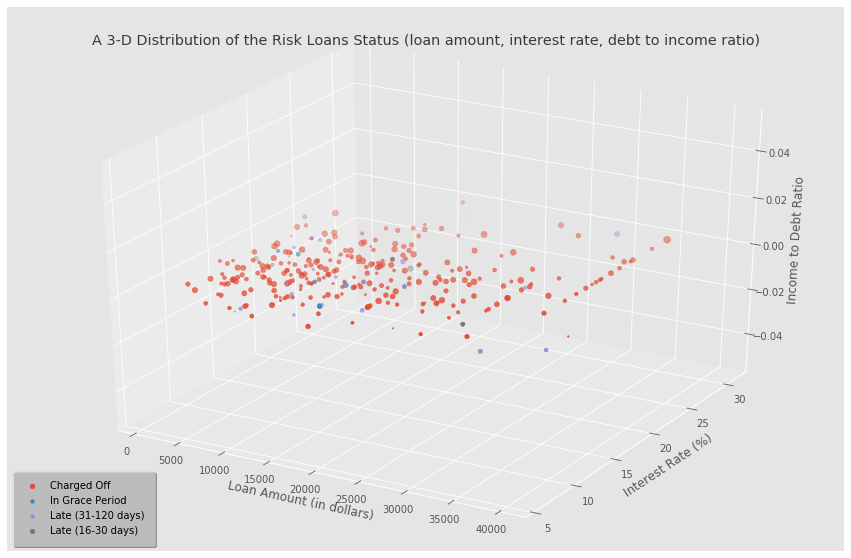

In [12]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

p = plt.subplot(1, 1, 1, projection='3d')

test_df = test_df[test_df['loan_status'] != 'Fully Paid']

ls_list = test_df['loan_status'].unique().tolist()


for l in ls_list:
    loan_data_sub = test_df[test_df['loan_status'] == l]
    plt.scatter(loan_data_sub['loan_amnt'], loan_data_sub['int_rate'], loan_data_sub['dti'], 
                label=l, cmap="Blues")


p.set_xlabel('Loan Amount (in dollars)')
p.set_ylabel('Interest Rate (%)')
p.set_zlabel('Income to Debt Ratio')
plt.title('A 3-D Distribution of the Risk Loans Status (loan amount, interest rate, debt to income ratio)', 
          alpha=0.75)

plt.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='lower left')

plt.savefig('plots/47.png', bbox_inches="tight")
plt.show()

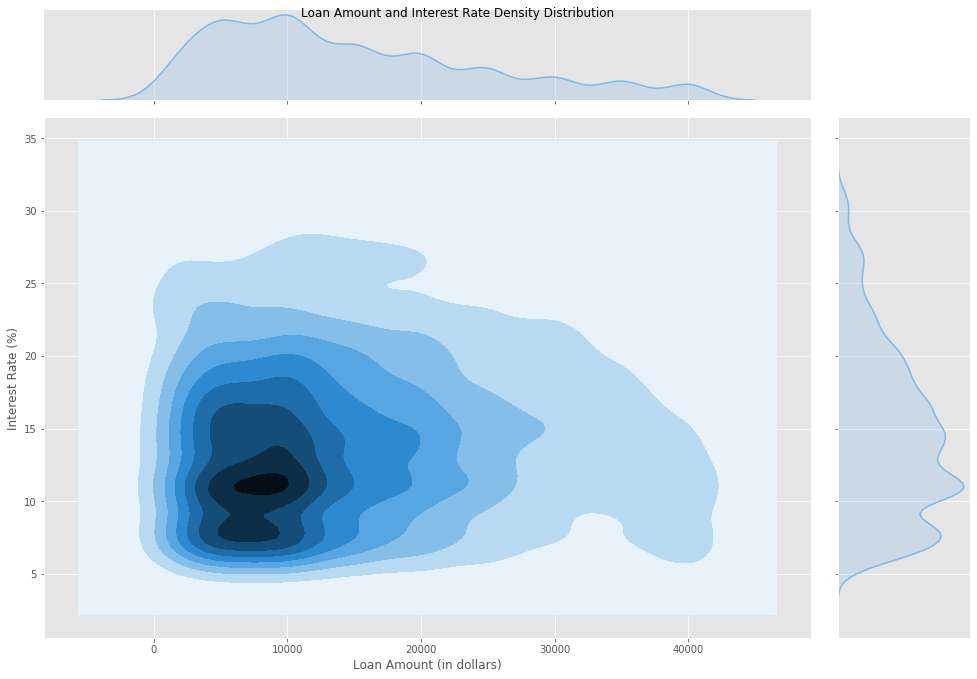

In [25]:
loan_data_sub = loan_data.head(10000)
g = sns.jointplot(loan_data_sub['loan_amnt'], loan_data_sub['int_rate'], kind="kde", color="#7CB9E8")

g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.set_axis_labels("Loan Amount (in dollars)", "Interest Rate (%)")
g.fig.suptitle('Loan Amount and Interest Rate Density Distribution')

plt.savefig('plots/48.png', bbox_inches="tight")
plt.show()

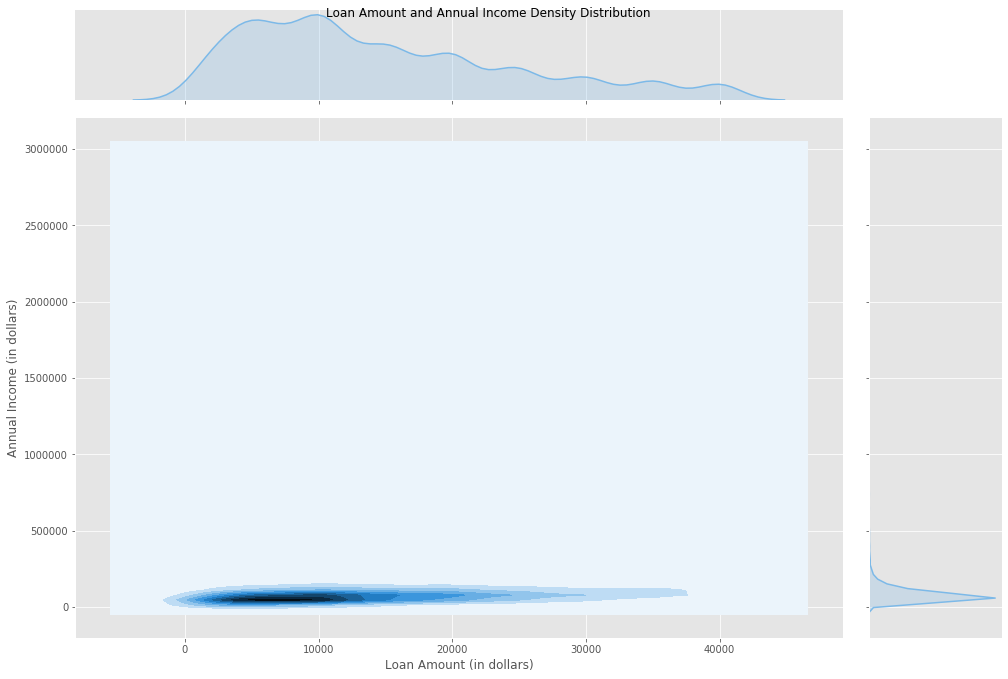

In [26]:
g = sns.jointplot(loan_data_sub['loan_amnt'], loan_data_sub['annual_inc'], kind="kde", color="#7CB9E8")

g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.set_axis_labels("Loan Amount (in dollars)", "Annual Income (in dollars)")
g.fig.suptitle('Loan Amount and Annual Income Density Distribution')

plt.savefig('plots/49.png', bbox_inches="tight")
plt.show()

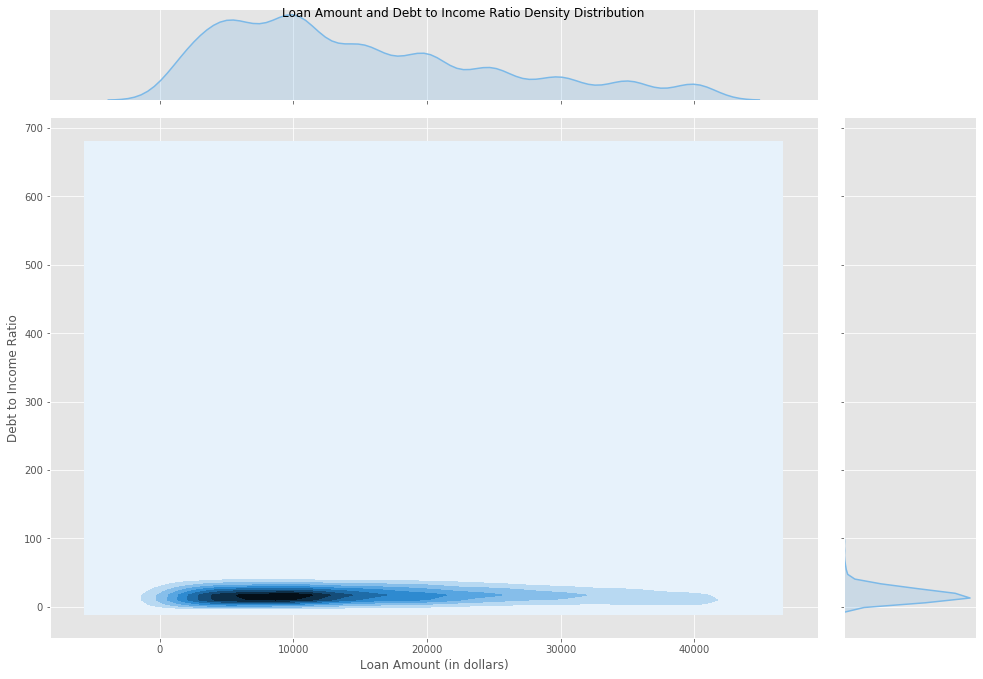

In [27]:
g = sns.jointplot(loan_data_sub['loan_amnt'], loan_data_sub['dti'], kind="kde", color="#7CB9E8")

g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.set_axis_labels("Loan Amount (in dollars)", "Debt to Income Ratio")
g.fig.suptitle('Loan Amount and Debt to Income Ratio Density Distribution')

plt.savefig('plots/50.png', bbox_inches="tight")
plt.show()

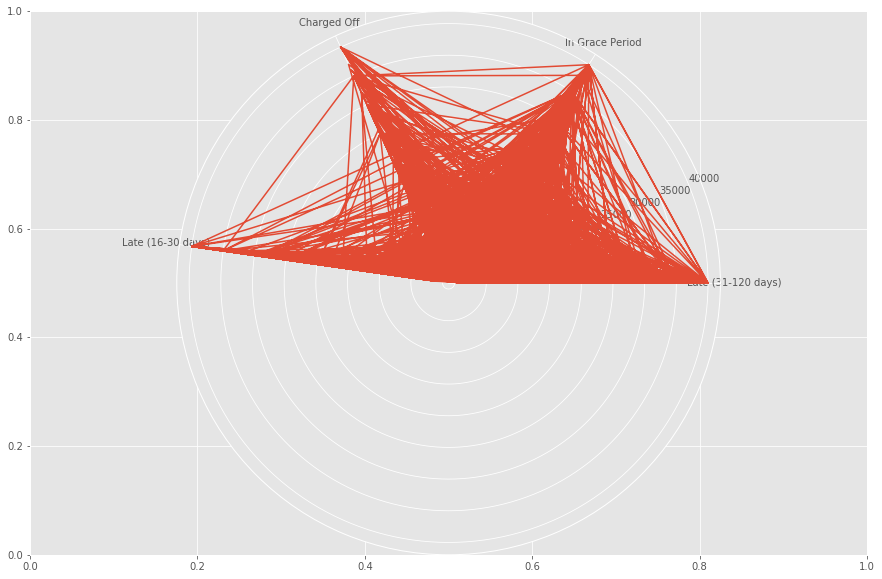

In [42]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

ax = fig.add_subplot(111, projection='polar')

loan_data_sub = loan_data_sub[loan_data_sub['loan_status'] != 'Fully Paid']
ls_list = loan_data_sub['loan_status'].unique().tolist()

plt.plot(loan_data_sub['loan_status'], loan_data_sub['loan_amnt'])



plt.show()